In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

t=np.genfromtxt('tiempofps.txt')/30.0 
##tiempo (en segundos)
L,x,y=50*10**(-2),48.5*10**(-2),12*10**(-2) 
##Longitud diagonal, largo y alto de la mesa (en metros)
errr,errt=5*10**(-4),1/60 
##Error en la medición usando regla (en metros) y error en la medición del tiempo (en segundos)
a=np.arctan(y/x) 
##Fórmula para el ángulo de la rampa (en radianes)
erra=errr*(1+y/L)/x
##Error en la medición del ángulo (en radianes)
g=10*L/(3*t**2*np.sin(a)) 
##Aceleración de gravedad (en metros por segundo al cuadrado)
errg=(10/(3*t**2*np.sin(a)))*(errr+(L*np.cos(a)*erra/np.sin(a))+(2*L*errt/t)) 
##Error en la medición de la aceleración de gravedad (en metros por segundo al cuadrado)

In [2]:
print(np.mean(g))

9.134970965237699


In [3]:
print(np.mean(errg))

0.4066161185720937


# Gráfico valor de $g$ obtenido vs medición en la que se realizó

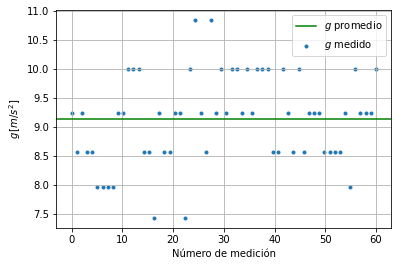

In [4]:
plt.scatter(np.linspace(0,len(g),len(g)),g,marker='.',label='$g$ medido')
plt.axhline(y=np.mean(g),color='green',linestyle='-',label='$g$ promedio')
plt.xlabel('Número de medición')
plt.ylabel('$g\,[m/s^2]$')
plt.legend()
plt.grid()

# Histograma de los valores de $g$ obtenidos

Graficamos el histograma para los valores de $g$ y la función gaussiana que puede modelar a este.

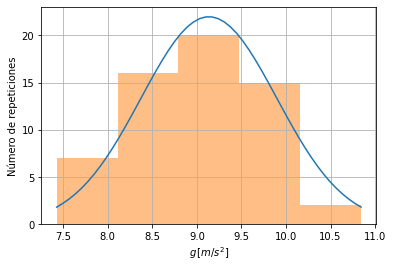

In [5]:
x=np.linspace(np.min(g),np.max(g))
def f(x):
    return 1/(2*np.pi*np.std(g))**0.5*np.e**(-(x-np.mean(g))**2/(2*np.std(g)**2))

hist,bin_edges=np.histogram(g,bins=5)
plt.plot(x, f(x)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x))
plt.hist(g,bins=5,alpha=0.5,rwidth=1,label='Histograma')
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()

# Error entre el histograma y la función que lo modela

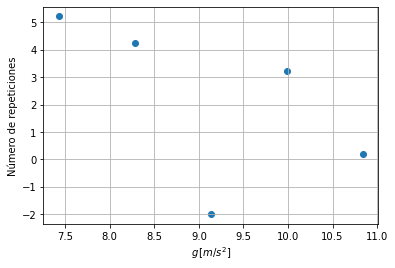

In [6]:
xx=np.linspace(np.min(g),np.max(g),5)
plt.scatter(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x),label='Error en el modelo')
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()

# Modelo para corregir el error 

Usaremos un polinomio de grado 4 para tratar de corregir el error entre la función que 
modela la distribución de los valores de $g$ y los valores dados por el histograma.

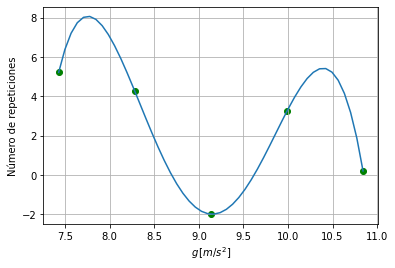

In [7]:
u=np.linspace(np.min(g),np.max(g))
c=np.polyfit(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x),4)
def p(u):
    return c[0]*u**4+c[1]*u**3+c[2]*u**2+c[3]*u+c[4]
plt.plot(u,p(u))
plt.scatter(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x),label='Error en el modelo',color='green')
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()

# Corrección de la función que modela al histograma

Para corregir la función $f(x)$ le sumamos la función $p(x)$ que modela el error original
entre el histograma y la función que lo modela.

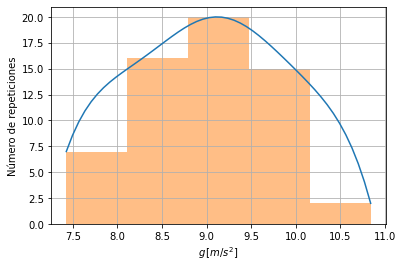

In [8]:
plt.plot(x, f(x)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x)+p(x))
plt.hist(g,5,alpha=0.5,rwidth=1,label='Histograma')
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()

# Error entre el histograma y la función corregida

Podemos notar que el error con esta nueva función se reduce hasta a un valor igual a $\frac{1}{4}$ del
error original en algunos casos, con lo que podemos concluir que la corrección del modelo funcionó.

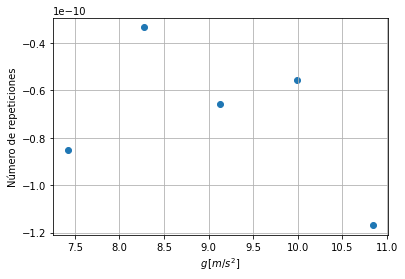

In [9]:
plt.scatter(xx,hist-f(xx)*np.sum(hist*(np.max(g)-np.min(g))/5)/integrate.simpson(f(x),x)-p(xx))
plt.xlabel('$g\,[m/s^2]$')
plt.ylabel('Número de repeticiones')
plt.grid()